<a href="https://colab.research.google.com/github/visu21ab/computational_bias_detection/blob/main/frame_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pre-requisite files
- Merged dataset of syria balanced file and ukraine balanced file

Annotate full dataset with frames based on number of seed words in frame_identification_corpus

In [1]:
import tensorflow
import pandas as pd

In [8]:
# Define the seed words for each frame
political_words = ['government', 'president', 'minister', 'official', 'leader', 'member', 'regime', 'power', 'political', 'service', 'policy', 'council', 'plan', 'sanction', 'agency', 'office', 'secretary', 'system', 'public', 'authority']
displacement_words = ['city', 'state', 'home', 'border', 'international', 'foreign', 'united', 'house', 'region', 'area', 'national', 'community', 'local', 'west', 'town', 'peace']
humanitarian_words = ['people', 'child', 'support', 'family', 'help', 'group', 'need', 'work', 'woman', 'report', 'life', 'crisis', 'conflict', 'call', 'human', 'party', 'food', 'action', 'issue', 'situation', 'opposition', 'statement', 'effort', 'change', 'company', 'supply', 'response']
violence_words = ['force', 'military', 'attack', 'security', 'invasion', 'civilian', 'killed', 'humanitarian', 'weapon', 'troop', 'fighting', 'police', 'camp', 'strike', 'missile', 'army']

# Read in the dataframe
df = pd.read_csv('drive/MyDrive/Master Thesis/general_complete.csv')

# Create new columns for each frame and initialize to 0
df['Political'] = 0
df['Displacement'] = 0
df['Humanitarian'] = 0
df['Violence'] = 0

# Loop through each article in the dataframe
for i, row in df.iterrows():
    article_text = row['frame_identification_corpus'] # convert text to lowercase
    political_count = 0
    displacement_count = 0
    humanitarian_count = 0
    violence_count = 0
    
    # Check how many seed words are in each frame
    for word in political_words:
        if word in article_text:
            political_count += 1
    for word in displacement_words:
        if word in article_text:
            displacement_count += 1
    for word in humanitarian_words:
        if word in article_text:
            humanitarian_count += 1
    for word in violence_words:
        if word in article_text:
            violence_count += 1
    
    # Assign the top two frames to the article
    frames = []
    counts = [political_count, displacement_count, humanitarian_count, violence_count]
    for j in range(2):
        max_count = max(counts)
        if max_count > 0:
            max_index = counts.index(max_count)
            if max_index == 0:
                frames.append('Political')
            elif max_index == 1:
                frames.append('Displacement')
            elif max_index == 2:
                frames.append('Humanitarian')
            else:
                frames.append('Violence')
            counts[max_index] = -1
    
    # Update the dataframe with the assigned frames
    for frame in frames:
        df.at[i, frame] = 1

In [9]:
df.head()

,Unnamed: 0,Date,Headline,merged_text,id,parsing_corpus,frame_identification_corpus,Political,Displacement,Humanitarian,Violence
0,0,2022-07-11,Scotland to pause Ukrainian refugee sponsorshi...,Scotland is to pause its Ukrainian refugee spo...,2022-07-11ScotlandtopauseUkrainianrefugeespons...,Scotland is to pause its Ukrainian refugee spo...,scotland pause ukrainian refugee sponsorship s...,1,0,1,0
1,1,2022-11-29,Ukrainian refugees and hosts petition UK gover...,Ukrainian refugees and their hosts have delive...,2022-11-29UkrainianrefugeesandhostspetitionUKg...,Ukrainian refugees and their hosts have delive...,ukrainian refugee host delivered petition down...,1,0,1,0
2,2,2022-11-27,Concern for health of Ukrainians aboard Scotla...,The physical and mental health of Ukrainian re...,2022-11-27ConcernforhealthofUkrainiansaboardSc...,The physical and mental health of Ukrainian re...,physical mental health ukrainian refugee livin...,1,0,1,0
3,3,2022-12-23,âIâm in a safe placeâ: Ukrainian refugee...,"Like many Ukrainian refugees, Yuliia Kashperen...",2022-12-23âIâminasafeplaceâ:Ukrainianref...,Like many Ukrainian refugees Yuliia Kashperenk...,like many ukrainian refugee yuliia kashperenko...,0,1,1,0
4,4,2022-05-05,The Ukrainian children at the mercy of UKâs ...,Nazarii has spent the last three weeks listeni...,2022-05-05TheUkrainianchildrenatthemercyofUKâ...,Nazarii has spent the last three weeks listeni...,nazarii spent last three week listening fighte...,1,0,1,0


In [ ]:
df.head()

In [ ]:
# Save annotated file
df.to_csv('drive/MyDrive/Master Thesis/general_complete_annotated.csv')

#Distribution of Frames

Split dataset into Ukraine and Syria dataset

In [24]:
!pip install scienceplots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

import seaborn as sns

In [27]:
plt.style.use(['science', 'no-latex'])
plt.rcParams['figure.figsize'] = (6.4, 4.8)

In [22]:
df_concat = df 

# Calculate the midpoint index
midpoint = len(df_concat) // 2

# Split the dataframe into two dataframes
u_data = df_concat.iloc[:midpoint]
s_data = df_concat.iloc[midpoint:]

# Print the lengths of the two split dataframes
print(len(u_data))
print(len(s_data))

13554
13554


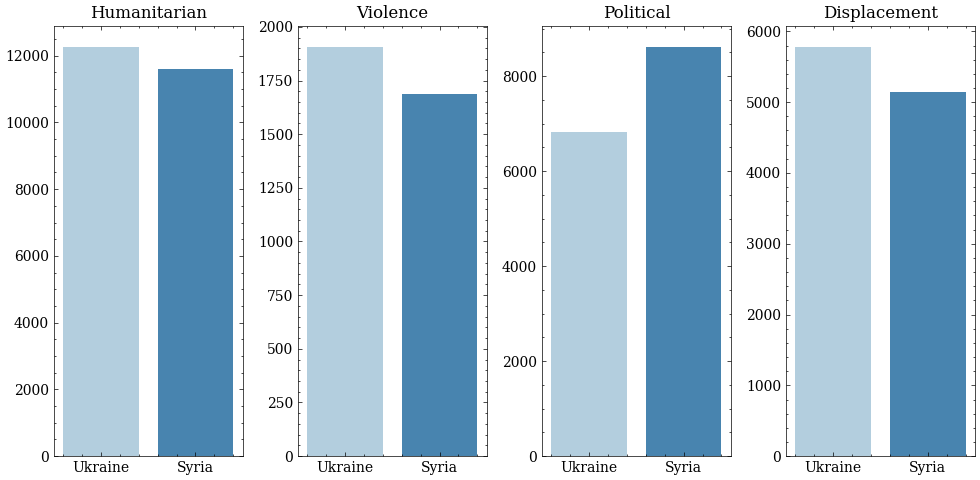

In [41]:
# create a list of column names
columns = ['Humanitarian', 'Violence', 'Political', 'Displacement']

# create a figure with multiple subplots
fig, axs = plt.subplots(1, len(columns), figsize=(10, 5))

# loop over the columns and create a bar chart for each one
for i, col in enumerate(columns):
    counts1 = u_data[u_data[col] == 1][col].count()
    counts2 = s_data[s_data[col] == 1][col].count()
    combined_counts = pd.DataFrame({'Ukraine': counts1, 'Syria': counts2}, index=[col])
    sns.barplot(data=combined_counts, ax=axs[i], palette='Blues', hue_order=['Ukraine', 'Syria'])
    axs[i].set_title(col)

# add a legend to the last subplot
axs[-1].legend(loc='upper right')

# adjust the spacing between subplots
fig.tight_layout()

# show the figure
plt.show()